# 데이터 만지기

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 한글깨짐문제해결
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='AppleGothic')

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,거래금액,건축년도,거래년도,법정동,아파트,거래월,거래일,전용면적,지번,지역코드,...,주차공간(지하),버스정류장,지하철,동갯수,일반관리인원,엘리베이터갯수,사용승인일,지하철노선,지하철역,부대/복리시설
0,14500,2007,2007,동인동1가,삼승슈퍼타워,8,1~10,83.50,362,27110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15300,2007,2007,동인동1가,삼승슈퍼타워,8,21~31,83.50,362,27110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16920,2007,2007,동인동1가,삼승슈퍼타워,8,21~31,83.50,362,27110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16000,2006,2007,봉산동,봉산뜨란채,8,1~10,75.95,110,27110,...,184.0,5~10분이내,10~15분이내,3.0,3.0,0.0,2006-08-18,2호선,경대병원,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 자전거보관소"
4,9200,1975,2007,수동,희도맨션,8,1~10,101.26,101,27110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 누락된 값 다루기

In [3]:
# A10027678 <- 아파트코드가 편의시설, 교육시설 정보가 없네요.
df.iloc[5799]

거래금액                                               29400
건축년도                                                2015
거래년도                                                2016
법정동                                                  대봉동
아파트                                           대봉태왕아너스아파트
거래월                                                    3
거래일                                                21~31
전용면적                                               59.97
지번                                                   758
지역코드                                               27110
층                                                      5
법정동코드                                         2711015700
아파트코드                                          A10027678
복도형식                                                 계단식
난방방식                                                개별난방
관리방식                                                위탁관리
건축구조                                            철근콘크리트구조
편의시설                           

#### 편의시설과 교육시설의 누락값을 채워보자.
#### 네이버에 대봉태왕아너스아파트를 쳐서 가장 가까이 있는 아파트의 편의시설과 교육시설값을 채워넣는다. (대봉동)
#### 대봉청구타운이 가장 근접.

In [4]:
df[df['아파트']=='대봉청구타운'].head(5)

,거래금액,건축년도,거래년도,법정동,아파트,거래월,거래일,전용면적,지번,지역코드,...,주차공간(지하),버스정류장,지하철,동갯수,일반관리인원,엘리베이터갯수,사용승인일,지하철노선,지하철역,부대/복리시설
474,16000,1978,2008,대봉동,대봉청구타운,6,21~30,84.13,55-3,27110,...,0.0,5분이내,5분이내,2.0,1.0,4.0,1978-11-18,2호선,경대병원,"관리사무소, 어린이놀이터, 자전거보관소"
730,13000,1978,2009,대봉동,대봉청구타운,2,21~28,84.13,55-3,27110,...,0.0,5분이내,5분이내,2.0,1.0,4.0,1978-11-18,2호선,경대병원,"관리사무소, 어린이놀이터, 자전거보관소"
876,14000,1978,2009,대봉동,대봉청구타운,5,11~20,84.13,55-3,27110,...,0.0,5분이내,5분이내,2.0,1.0,4.0,1978-11-18,2호선,경대병원,"관리사무소, 어린이놀이터, 자전거보관소"
1135,14500,1978,2009,대봉동,대봉청구타운,9,11~20,84.13,55-3,27110,...,0.0,5분이내,5분이내,2.0,1.0,4.0,1978-11-18,2호선,경대병원,"관리사무소, 어린이놀이터, 자전거보관소"
1196,11700,1978,2009,대봉동,대봉청구타운,10,11~20,84.13,55-3,27110,...,0.0,5분이내,5분이내,2.0,1.0,4.0,1978-11-18,2호선,경대병원,"관리사무소, 어린이놀이터, 자전거보관소"


In [5]:
# 편의시설값 할당을 위한 함수
def assign_v(x):
    if x=='-':
        x = df[df['아파트']=='대봉청구타운']['편의시설'].iloc[0]
    return x

# 편의시설 값 할당
df['편의시설'] = df['편의시설'].apply(assign_v)

In [6]:
# 교육시설값 할당을 위한 함수
# 위의 함수를 오버라이트한다.
def assign_v(x):
    if x=='-':
        x = df[df['아파트']=='대봉청구타운']['교육시설'].iloc[0]
    return x

# 교육시설 값 할당
df['교육시설'] = df['교육시설'].apply(assign_v)

In [7]:
df.columns

Index(['거래금액', '건축년도', '거래년도', '법정동', '아파트', '거래월', '거래일', '전용면적', '지번',
       '지역코드', '층', '법정동코드', '아파트코드', '복도형식', '난방방식', '관리방식', '건축구조', '편의시설',
       '교육시설', '주차공간(지상)', '주차공간(지하)', '버스정류장', '지하철', '동갯수', '일반관리인원',
       '엘리베이터갯수', '사용승인일', '지하철노선', '지하철역', '부대/복리시설'],
      dtype='object')

In [8]:
# 데이터를 얻기위해 필요했던 열들을 삭제
df = df.drop(['거래일', '지번', '지역코드', '법정동코드', '아파트코드', '건축구조', '사용승인일'], axis=1)

# 도표띄우기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 6925
Data columns (total 23 columns):
거래금액        6926 non-null int64
건축년도        6926 non-null int64
거래년도        6926 non-null int64
법정동         6926 non-null object
아파트         6926 non-null object
거래월         6926 non-null int64
전용면적        6926 non-null float64
층           6926 non-null int64
복도형식        5891 non-null object
난방방식        5891 non-null object
관리방식        5891 non-null object
편의시설        5891 non-null object
교육시설        5891 non-null object
주차공간(지상)    5891 non-null float64
주차공간(지하)    5891 non-null float64
버스정류장       5891 non-null object
지하철         5891 non-null object
동갯수         5891 non-null float64
일반관리인원      5891 non-null float64
엘리베이터갯수     5891 non-null float64
지하철노선       5891 non-null object
지하철역        5891 non-null object
부대/복리시설     5891 non-null object
dtypes: float64(6), int64(5), object(12)
memory usage: 1.3+ MB


숫자데이터와 문자열데이터를 분리합니다.

In [10]:
# 자료형으로 데이터 분리

def div_cols(df):
    df_division = {'number': [], 'string': []}
    for i in df.columns:
        # 숫자데이터
        if df[i].dtype=='int64':
            df_division['number'].append(i)
        elif df[i].dtype=='float64':
            df_division['number'].append(i)
        # 문자데이터
        else:
            df_division['string'].append(i)
    return df_division

In [11]:
df_division = div_cols(df)

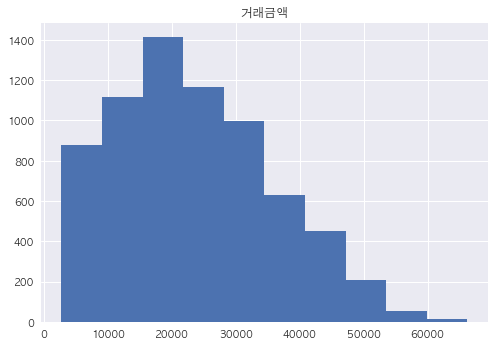

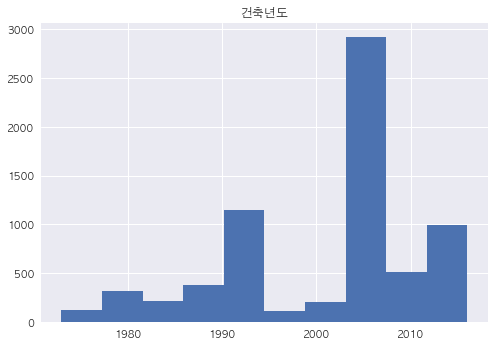

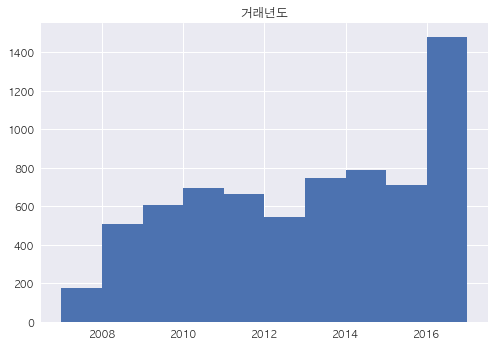

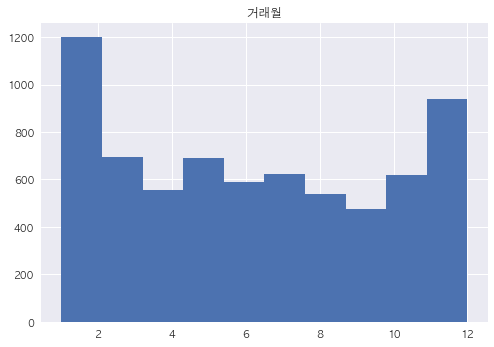

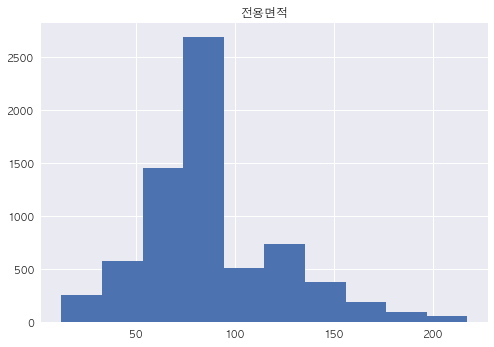

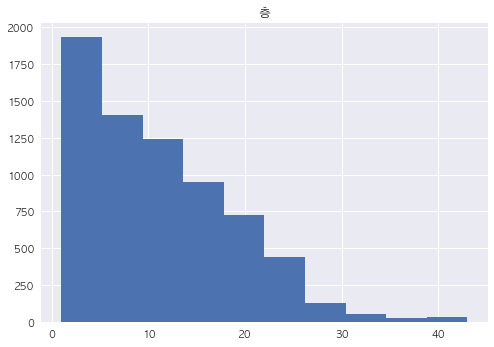

ValueError: max must be larger than min in range parameter.

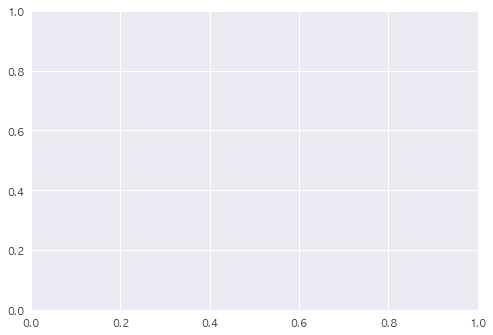

In [12]:
# 숫자데이터 히스토그램 띄우기
for i in df_division['number']:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

벨류 에러가 났네요. 누락값이 있다는말
value error: NaN value in columns
누락값이 있는 모든 열을 삭제합니다.

In [13]:
df.isnull().sum()

거래금액           0
건축년도           0
거래년도           0
법정동            0
아파트            0
거래월            0
전용면적           0
층              0
복도형식        1035
난방방식        1035
관리방식        1035
편의시설        1035
교육시설        1035
주차공간(지상)    1035
주차공간(지하)    1035
버스정류장       1035
지하철         1035
동갯수         1035
일반관리인원      1035
엘리베이터갯수     1035
지하철노선       1035
지하철역        1035
부대/복리시설     1035
dtype: int64

In [14]:
# NaN값이 있는 모든행을 삭제.
# 새로 인덱싱
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
df.shape

(5891, 23)

천개정도의 데이터가 날라갔네요.

전용면적을 알아보기 쉽게 평수로 변환

In [16]:
# 전용면적 평수로 변환

df['전용면적'] = df['전용면적'].apply(lambda x: round(x/3.31, 1))
df.rename(columns={'전용면적': '전용면적(평)'}, inplace=True)

#### 편의시설, 교육시설, 부대/복리시설 칼럼 더 세분화 시킬 필요가 있음

## 편의시설

In [17]:
# 편의시설안에 있는 각 항목의 갯수를 셉니다.

def subtract_number_of(col):
    dic = Counter(col)
    new_dic = {}
    for key in dic.keys():
        sub_dic = {}
        new_key = key.replace(' ', '')
        list_one = new_key.split(')')
        for i in list_one:
            if i=='':
                pass
            else:
                list_two = i.split('(')
                if '' in list_two:
                    number = 0
                else:
                    number = len(list_two[1].split(','))
                sub_dic[list_two[0]] = number
        new_dic[key] = sub_dic
    return new_dic

In [18]:
# 이 함수는 기존의 표와 새로만들어진 표(갯수가 포함된)를 합칩니다.

def merge_df(df, dic, col_name):
    n_df = pd.DataFrame.from_dict(dic, orient='index', dtype='int')
    n_df.reset_index(inplace=True)
    # 표를 합치기위해 같은 열의 이름을 씁니다.
    n_df.rename(columns={'index': col_name}, inplace=True)
    n_df.fillna(0, inplace=True)
    df = pd.merge(df, n_df, how='left', on=col_name)
    return df

In [19]:
dic = subtract_number_of(df['편의시설'])

In [20]:
df = merge_df(df, dic, '편의시설')

In [21]:
df.rename(columns={'관공서': '주변편의시설갯수(관공서)', '병원': '주변편의시설갯수(병원)', '백화점': '주변편의시설갯수(백화점)',\
                   '대형상가': '주변편의시설갯수(대형상가)', '기타': '주변편의시설갯수(기타)', '공원': '주변편의시설갯수(공원)'}, inplace=True)
df.head()

,거래금액,건축년도,거래년도,법정동,아파트,거래월,전용면적(평),층,복도형식,난방방식,...,엘리베이터갯수,지하철노선,지하철역,부대/복리시설,주변편의시설갯수(관공서),주변편의시설갯수(병원),주변편의시설갯수(백화점),주변편의시설갯수(대형상가),주변편의시설갯수(기타),주변편의시설갯수(공원)
0,16000,2006,2007,봉산동,봉산뜨란채,8,22.9,3,계단식,개별난방,...,0.0,2호선,경대병원,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 자전거보관소",2.0,1,1.0,1.0,1.0,0.0
1,5800,1985,2007,태평로1가,라이프아파트,8,16.5,8,복도식,개별난방,...,2.0,1호선,대구,"관리사무소, 노인정, 자전거보관소",5.0,1,2.0,1.0,2.0,1.0
2,5500,1985,2007,태평로1가,라이프아파트,8,16.5,6,복도식,개별난방,...,2.0,1호선,대구,"관리사무소, 노인정, 자전거보관소",5.0,1,2.0,1.0,2.0,1.0
3,43000,2006,2007,대신동,태왕아너스스카이,8,57.8,8,계단식,개별난방,...,11.0,"2호선, 3호선",신남,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 자전거보관소",1.0,1,0.0,1.0,0.0,0.0
4,25000,1993,2007,남산동,보성황실타운,8,49.5,3,혼합식,개별난방,...,20.0,"1호선, 3호선",명덕,"관리사무소, 노인정, 주민공동시설, 어린이놀이터",6.0,2,0.0,1.0,5.0,0.0


## 교육시설

편의시설 데이터 다룰때와 같은 방법을 사용

In [22]:
df.교육시설

0       초등학교(경북대사범부속초,명덕초,영선초) 중학교(제일중,경북대사범부속중) 고등학교(...
1                      초등학교(옥산초,종로초) 중학교(경명여중) 고등학교(경명여고)
2                      초등학교(옥산초,종로초) 중학교(경명여중) 고등학교(경명여고)
3       초등학교(계성초,남산초) 중학교(계성중,성명여중) 고등학교(신명고) 대학교(계명대의...
4       초등학교(남산초,명덕초,남대구초,내당초) 중학교(경구중,경상중,구남중) 고등학교(경...
5       초등학교(남산초,명덕초,남대구초,내당초) 중학교(경구중,경상중,구남중) 고등학교(구...
6       초등학교(남산초,남대구초,명덕초) 중학교(경구중,제일중,경상중) 고등학교(경북공업고...
7       초등학교(남산초,명덕초,남대구초,내당초) 중학교(경구중,경상중,구남중) 고등학교(경...
8       초등학교(남산초,명덕초,남대구초,내당초) 중학교(경구중,경상중,구남중) 고등학교(경...
9       초등학교(남산초,남대구초,명덕초) 중학교(경구중,제일중,경상중) 고등학교(경북공업고...
10        초등학교(동덕초,삼덕초,대봉초) 중학교(신명여중) 고등학교(남산고) 대학교(경대치대)
11        초등학교(동덕초,삼덕초,대봉초) 중학교(신명여중) 고등학교(남산고) 대학교(경대치대)
12      초등학교(대구초,경대사대부속초,삼덕초) 중학교(경대사대부속중,제일여중,신명여중) 고...
13                     초등학교(옥산초,종로초) 중학교(경명여중) 고등학교(경명여고)
14      초등학교(종로초,수창초,계성초,대성초,남산초,대구초) 중학교(계성중,성명여중) 고등...
15      초등학교(남산초,명덕초,남대구초,내당초) 중학교(경구중,경상중,구남중) 고등학교(경...
16      초등학교(남산초,명덕초,남대구초,내당초) 중학교(경구중,경상중,구남중) 고등학교(경...
17      초등학교(남

In [23]:
# 값 추출
dic = subtract_number_of(df['교육시설'])

In [24]:
# 표 합치기
df = merge_df(df, dic, '교육시설')

In [25]:
df.rename(columns={'초등학교': '주변교육시설갯수(초등학교)', '중학교': '주변교육시설갯수(중학교)', '고등학교': '주변교육시설갯수(고등학교)', \
                  '대학교': '주변교육시설갯수(대학교)'}, inplace=True)
df.head()

,거래금액,건축년도,거래년도,법정동,아파트,거래월,전용면적(평),층,복도형식,난방방식,...,주변편의시설갯수(관공서),주변편의시설갯수(병원),주변편의시설갯수(백화점),주변편의시설갯수(대형상가),주변편의시설갯수(기타),주변편의시설갯수(공원),주변교육시설갯수(초등학교),주변교육시설갯수(중학교),주변교육시설갯수(고등학교),주변교육시설갯수(대학교)
0,16000,2006,2007,봉산동,봉산뜨란채,8,22.9,3,계단식,개별난방,...,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0
1,5800,1985,2007,태평로1가,라이프아파트,8,16.5,8,복도식,개별난방,...,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0
2,5500,1985,2007,태평로1가,라이프아파트,8,16.5,6,복도식,개별난방,...,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0
3,43000,2006,2007,대신동,태왕아너스스카이,8,57.8,8,계단식,개별난방,...,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0
4,25000,1993,2007,남산동,보성황실타운,8,49.5,3,혼합식,개별난방,...,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0


## 부대/복리시설

부대/복리시설은 몇개의 부대/복리시설을 가지고 있는지 갯수를 센다.

In [26]:
Counter(df['부대/복리시설'])

Counter({'관리사무소': 55,
         '관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 자전거보관소': 1225,
         '관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소': 203,
         '관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소, 기타': 785,
         '관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 휴게시설, 자전거보관소, 기타': 270,
         '관리사무소, 노인정, 어린이놀이터': 469,
         '관리사무소, 노인정, 어린이놀이터, 자전거보관소': 773,
         '관리사무소, 노인정, 자전거보관소': 65,
         '관리사무소, 노인정, 주민공동시설, 어린이놀이터': 674,
         '관리사무소, 노인정, 주민공동시설, 어린이놀이터, 자전거보관소': 1160,
         '관리사무소, 어린이놀이터, 자전거보관소': 143,
         '관리사무소, 주민공동시설': 69})

In [27]:
dic = Counter(df['부대/복리시설'])
new_dic = {}
for key in dic.keys():
    sub_dic = {}
    number = len(key.split(','))
    new_dic[key] = number
new_dic

{'관리사무소': 1,
 '관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 자전거보관소': 7,
 '관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소': 9,
 '관리사무소, 노인정, 보육시설, 문고, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소, 기타': 10,
 '관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 휴게시설, 자전거보관소, 기타': 8,
 '관리사무소, 노인정, 어린이놀이터': 3,
 '관리사무소, 노인정, 어린이놀이터, 자전거보관소': 4,
 '관리사무소, 노인정, 자전거보관소': 3,
 '관리사무소, 노인정, 주민공동시설, 어린이놀이터': 4,
 '관리사무소, 노인정, 주민공동시설, 어린이놀이터, 자전거보관소': 5,
 '관리사무소, 어린이놀이터, 자전거보관소': 3,
 '관리사무소, 주민공동시설': 2}

In [28]:
df['부대/복리시설갯수'] = df['부대/복리시설'].apply(lambda x: new_dic[x])
df.head(5)

,거래금액,건축년도,거래년도,법정동,아파트,거래월,전용면적(평),층,복도형식,난방방식,...,주변편의시설갯수(병원),주변편의시설갯수(백화점),주변편의시설갯수(대형상가),주변편의시설갯수(기타),주변편의시설갯수(공원),주변교육시설갯수(초등학교),주변교육시설갯수(중학교),주변교육시설갯수(고등학교),주변교육시설갯수(대학교),부대/복리시설갯수
0,16000,2006,2007,봉산동,봉산뜨란채,8,22.9,3,계단식,개별난방,...,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5
1,5800,1985,2007,태평로1가,라이프아파트,8,16.5,8,복도식,개별난방,...,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3
2,5500,1985,2007,태평로1가,라이프아파트,8,16.5,6,복도식,개별난방,...,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3
3,43000,2006,2007,대신동,태왕아너스스카이,8,57.8,8,계단식,개별난방,...,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5
4,25000,1993,2007,남산동,보성황실타운,8,49.5,3,혼합식,개별난방,...,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4


이제 기존의 편의시설, 교육시설, 부대/복리시설 열은 삭제. + 지하철노선은 필요없음.

In [29]:
df = df.drop(['편의시설', '교육시설', '부대/복리시설', '지하철노선'], axis=1)

In [30]:
# 편의시설 총 갯수
df['주변편의시설(총)'] = df['주변편의시설갯수(관공서)'] + df['주변편의시설갯수(병원)'] + \
                    df['주변편의시설갯수(백화점)'] + df['주변편의시설갯수(대형상가)'] + \
                    df['주변편의시설갯수(기타)'] + df['주변편의시설갯수(공원)']

In [31]:
# 교육시설 총 갯수
df['주변교육시설(총)'] = df['주변교육시설갯수(초등학교)'] + df['주변교육시설갯수(중학교)'] + \
                    df['주변교육시설갯수(고등학교)'] + df['주변교육시설갯수(대학교)']
df.shape

(5891, 32)

In [32]:
df.isnull().sum()

거래금액              0
건축년도              0
거래년도              0
법정동               0
아파트               0
거래월               0
전용면적(평)           0
층                 0
복도형식              0
난방방식              0
관리방식              0
주차공간(지상)          0
주차공간(지하)          0
버스정류장             0
지하철               0
동갯수               0
일반관리인원            0
엘리베이터갯수           0
지하철역              0
주변편의시설갯수(관공서)     0
주변편의시설갯수(병원)      0
주변편의시설갯수(백화점)     0
주변편의시설갯수(대형상가)    0
주변편의시설갯수(기타)      0
주변편의시설갯수(공원)      0
주변교육시설갯수(초등학교)    0
주변교육시설갯수(중학교)     0
주변교육시설갯수(고등학교)    0
주변교육시설갯수(대학교)     0
부대/복리시설갯수         0
주변편의시설(총)         0
주변교육시설(총)         0
dtype: int64

In [33]:
# 지하철 열에 '-'가 있다는 말은 주변 지하철이 없다는 뜻이므로 바꿔줘야함
# 지하철 열에는 총 5개의 범주화 데이터가 있다

Counter(df['지하철'])

Counter({'-': 238,
         '10~15분이내': 806,
         '15~20분이내': 953,
         '5~10분이내': 1135,
         '5분이내': 2759})

In [34]:
# 지하철역의 경우 중복데이터 있음
Counter(df['지하철역'])

Counter({'-': 404,
         '경대병원': 1034,
         '경대병원역': 610,
         '대구': 65,
         '대구2호선': 20,
         '명덕': 1140,
         '명덕,신남': 367,
         '반고개': 737,
         '반월당': 684,
         '반월당역': 64,
         '신남': 573,
         '신남역': 78,
         '칠성시장': 115})

In [35]:
# 지하철과 지하철역안에 '-' 값을 'NO!'로 바꿔줌
def f(x):
    if x=='-':
        x = x.replace('-', 'NO!')
    else:
        pass
    return x

df['지하철'] = df['지하철'].apply(f)
df['지하철역'] = df['지하철역'].apply(f)

In [36]:
# 중복레이블 병합하기 위한 딕셔너리 
sub_name = {'경대병원역': '경대병원', '대구2호선': '대구', '명덕,신남': '명덕', '반월당역': '반월당', '신남역': '신남'}

# 전체아이템을 돌면서 sub_name의 keys()에 있으면 새로운 이름으로 변경해줌
def f_(x):
    if x in sub_name.keys():
        x = sub_name[x]
    else:
        pass
    return x

df['지하철역'] = df['지하철역'].apply(f_)

In [37]:
Counter(df['지하철역'])

Counter({'NO!': 404,
         '경대병원': 1644,
         '대구': 85,
         '명덕': 1507,
         '반고개': 737,
         '반월당': 748,
         '신남': 651,
         '칠성시장': 115})

# PLOT DATA

In [38]:
# 데이터형에 따라 다시 나눠줍니다.
df_division = div_cols(df)

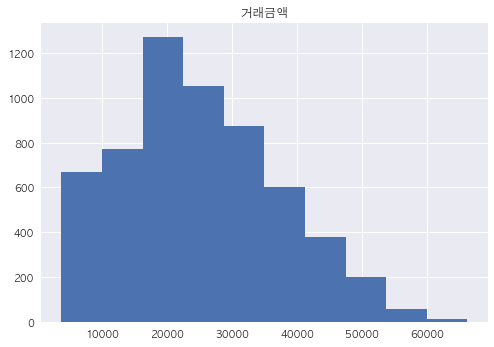

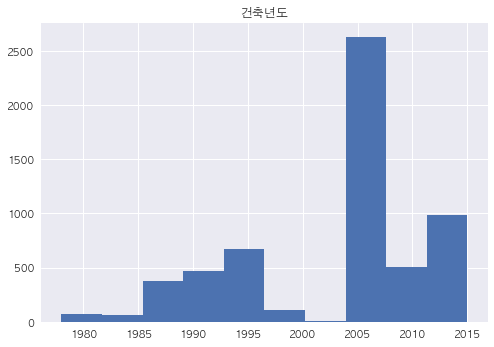

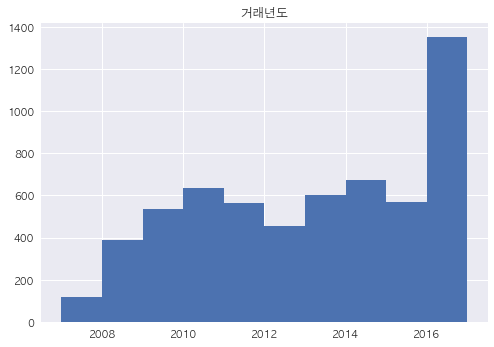

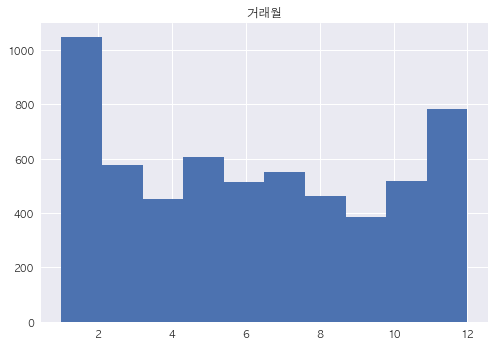

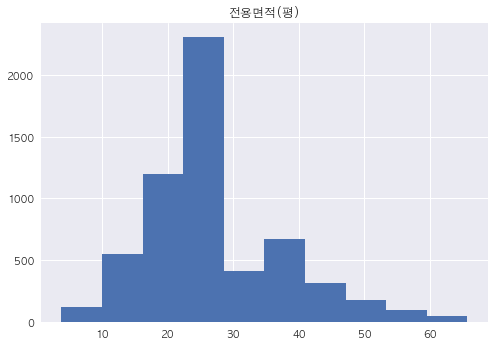

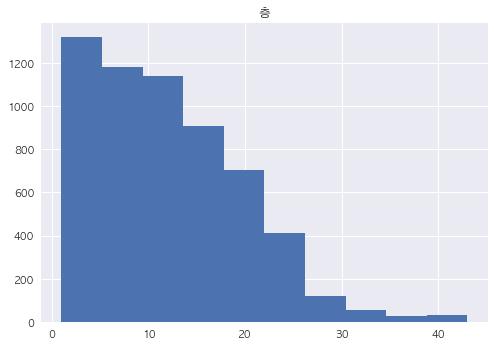

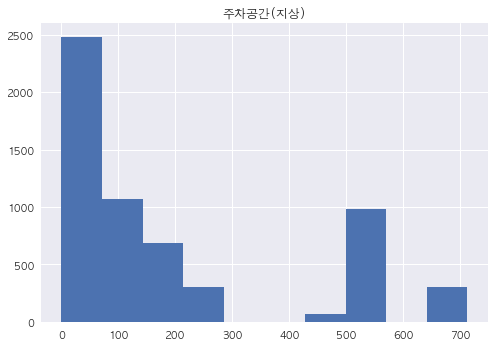

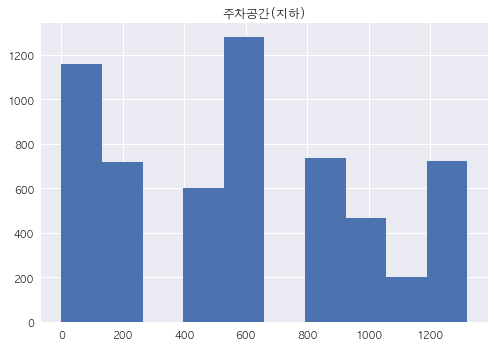

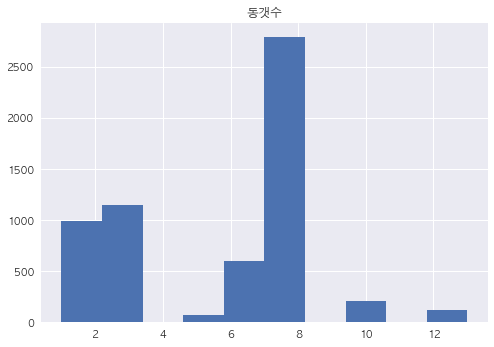

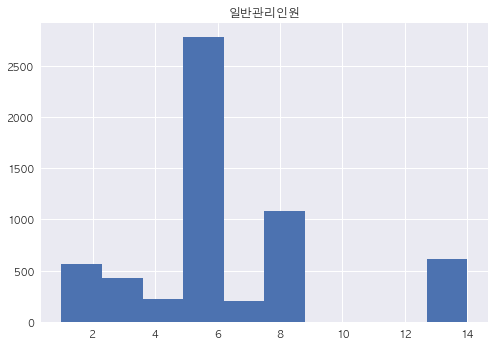

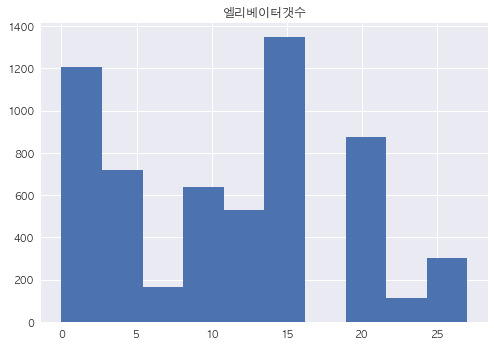

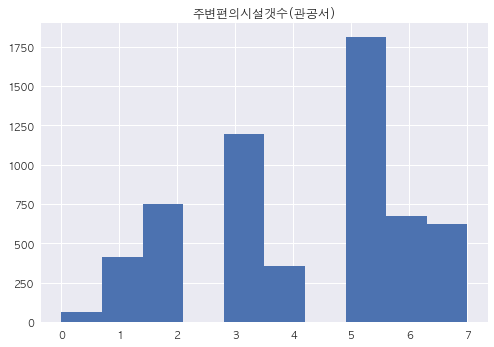

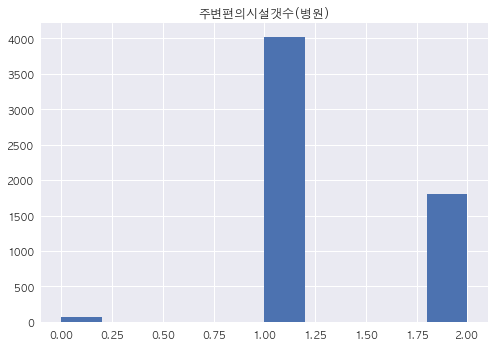

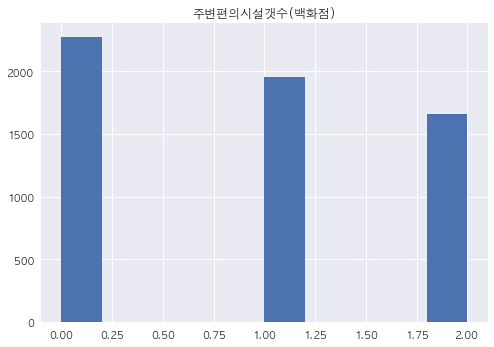

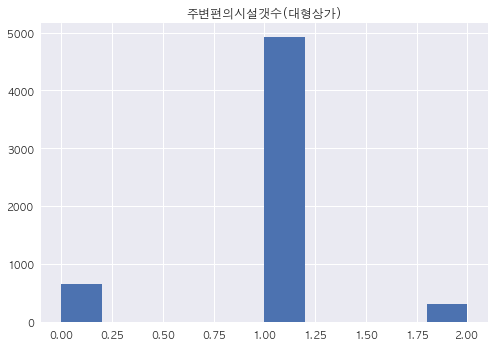

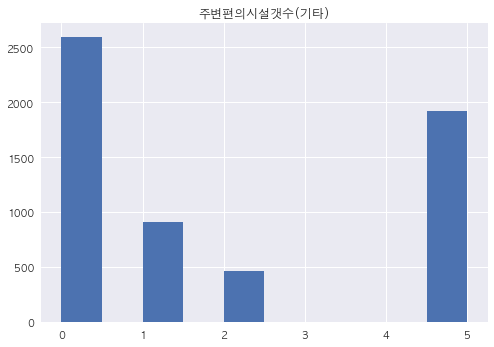

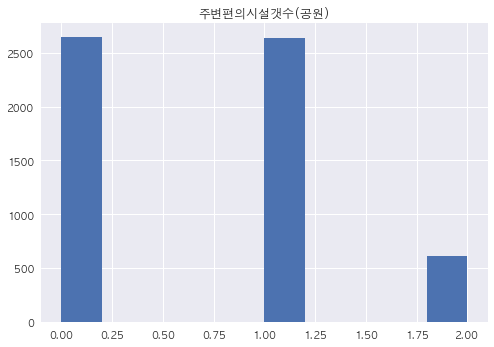

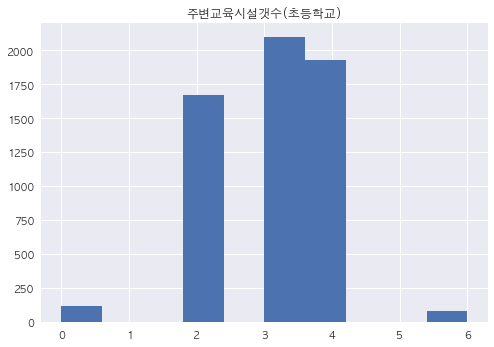

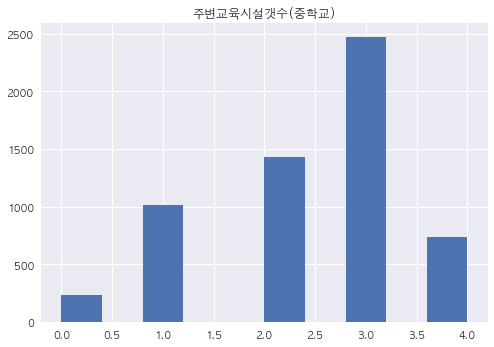

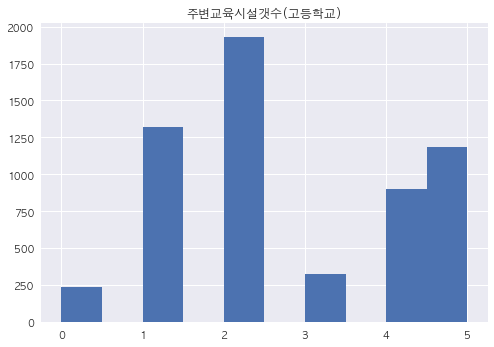

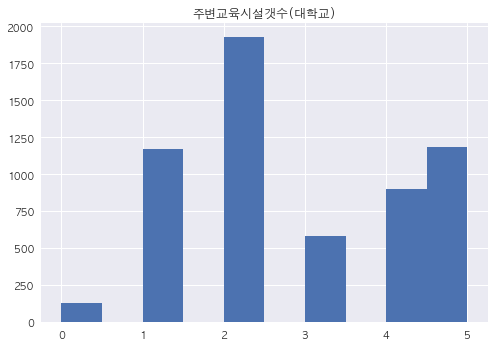

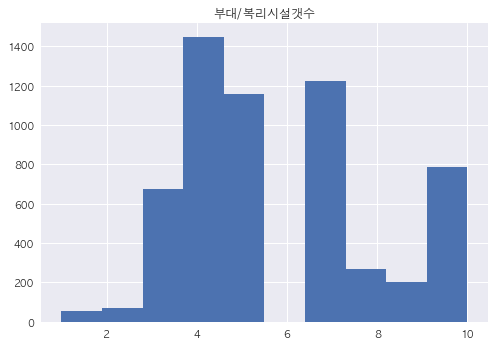

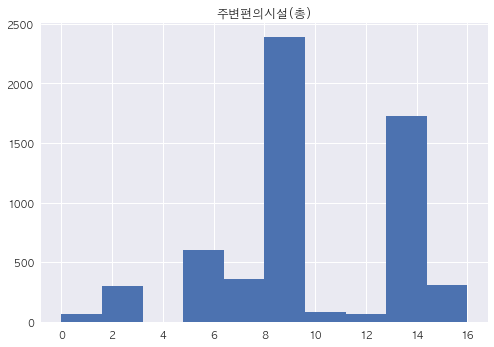

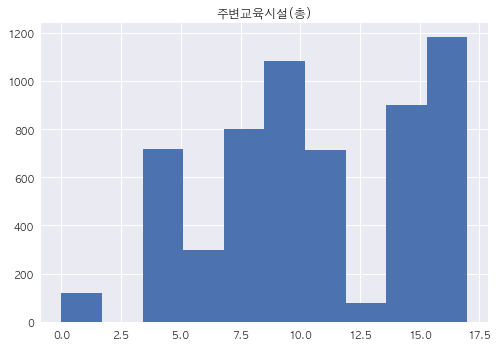

In [39]:
# 숫자형 자료들의 히스토그램

for i in df_division['number']:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

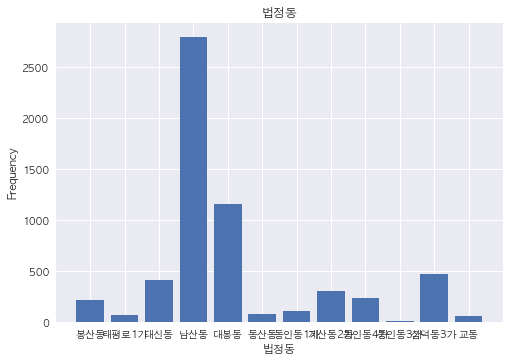

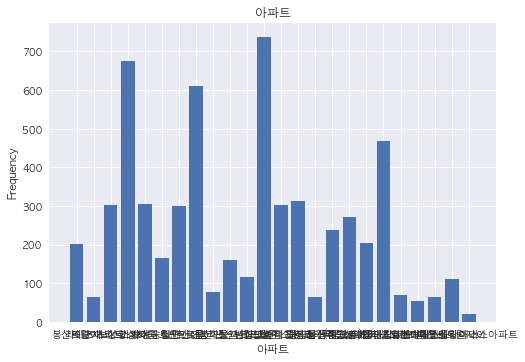

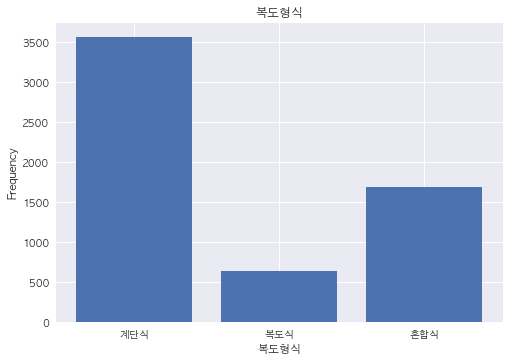

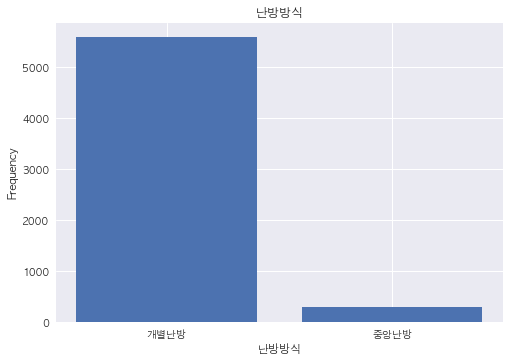

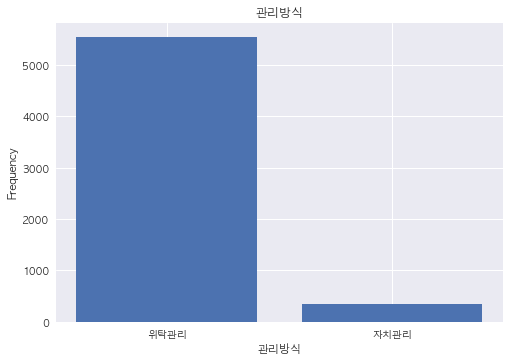

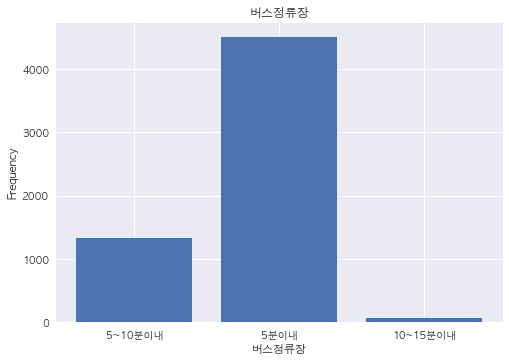

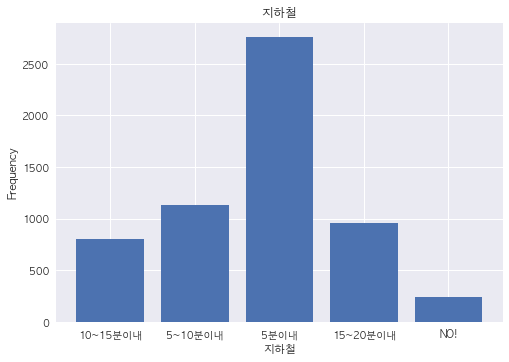

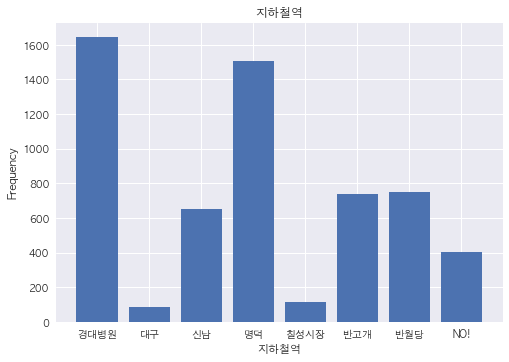

In [40]:
# 문자형 자료들의 히스토그램

for i in df_division['string']:
    # count frequency
    dic = Counter(df[i])
    k = dic.keys()
    v = dic.values()
    
    # set plt options
    y_pos = np.arange(len(k))
    plt.bar(y_pos, v, align='center')
    plt.xticks(y_pos, k)
    plt.ylabel('Frequency')
    plt.xlabel(i)
    plt.title(i)
    plt.show()

In [41]:
df_division['string']

['법정동', '아파트', '복도형식', '난방방식', '관리방식', '버스정류장', '지하철', '지하철역']

### 건축년도에 따른 복도형식, 난방방식, 관리방식 

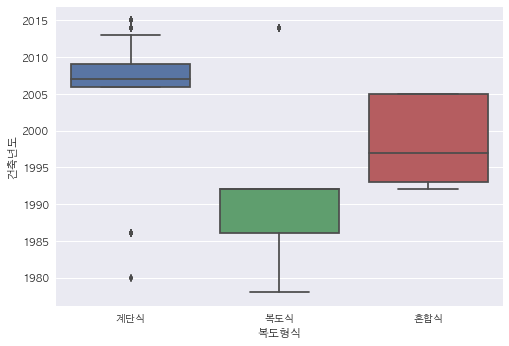

In [42]:
sns.boxplot(x='복도형식', y='건축년도', data=df)

복도식 --> 혼합식 --> 계단식

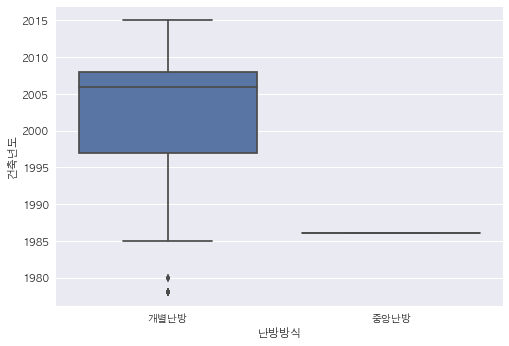

In [43]:
# 중앙난방은 1986년도에 지어진 청운아파트가 유일함.
Counter(df.loc[df['난방방식']=='중앙난방']['아파트'])
sns.boxplot(x='난방방식', y='건축년도', data=df)

중앙난방 --> 개별난방

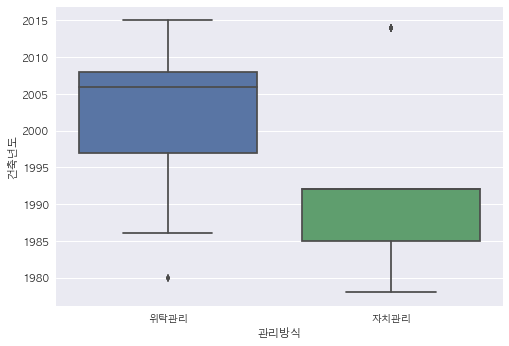

In [44]:
sns.boxplot(x='관리방식', y='건축년도', data=df)

자치관리 --> 위탁관리

### ( 대중교통-아파트 )거리와 거래금액의 관계

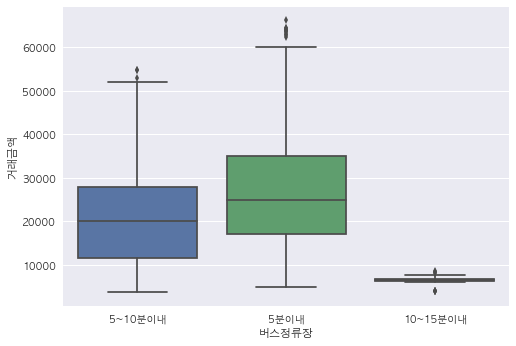

In [45]:
sns.boxplot(x='버스정류장', y='거래금액', data=df)

버스정류장과 가까운 아파트들이 비싸다.

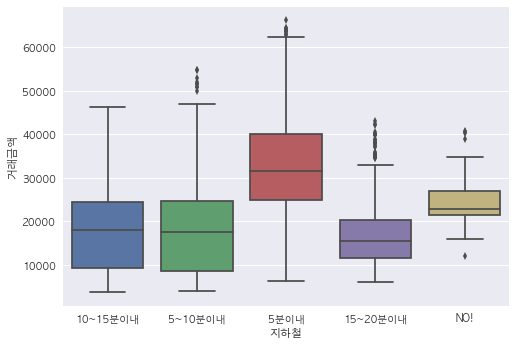

In [46]:
sns.boxplot(x='지하철', y='거래금액', data=df)

지하철과 5분이내 거리의 아파트들은 평균적으로 비싸다

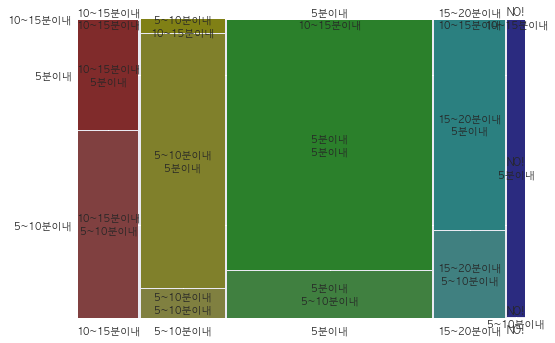

In [47]:
from statsmodels.graphics import mosaicplot
ax = mosaicplot.mosaic(df, ['지하철', '버스정류장'])

지하철과 버스정류장 데이터 대부분이 5분이내.

### 지하철역 구분 거래금액

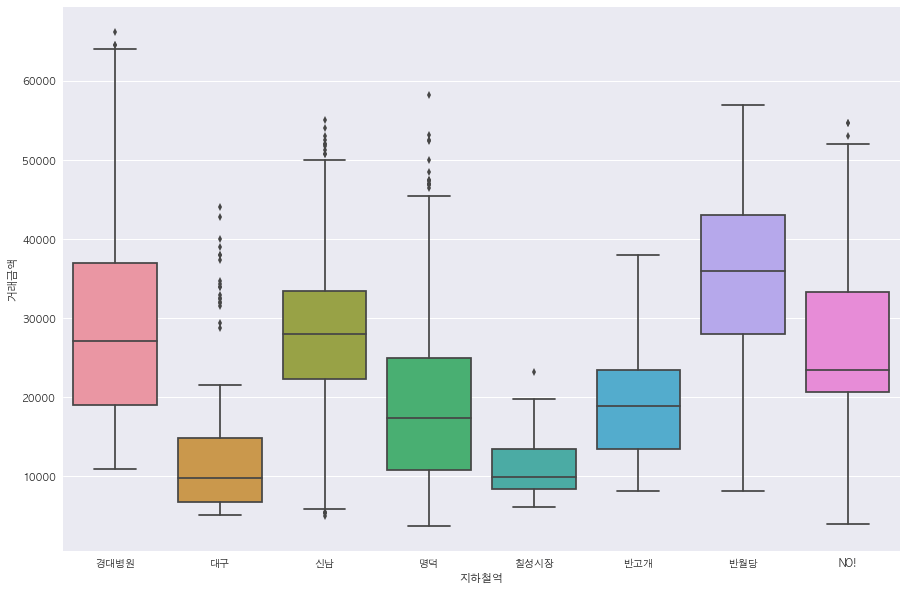

In [48]:
# create the matplotlib Figure and Axes objects ahead of time to set fig size
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='지하철역', y='거래금액', data=df, ax=ax)

### 동 구분 거래금액

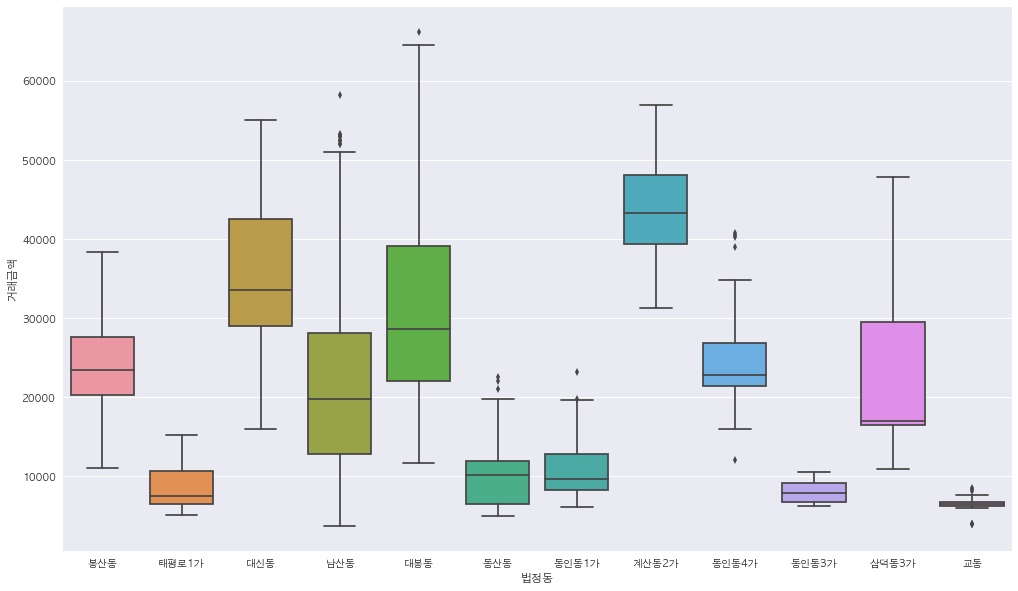

In [49]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(x='법정동', y='거래금액', data=df, ax=ax)

### 아파트별 거래금액

In [50]:
# 아파트이름이 길어서 그래프에 나타난 인덱스 겹쳐서 이름을 줄이자
old_new = {'극동스타클래스남산': '극동스타',
         '까치아파트': '까치',
         '남산그린타운': '그린타운',
         '남산휴먼시아2단지': '휴먼시아',
         '노마즈하우스': '노마즈',
         '대봉청구타운': '청구',
         '대봉태왕아너스아파트': '태왕아넛',
         '대봉화성파크드림': '대봉화성',
         '대신센트럴자이': '자이',
         '동산맨션': '동산',
         '동인동삼정그린코아': '그린콩',
         '동인시티타운': '시티',
         '라이프아파트': '라이프',
         '반월당삼정그린코아(아파트)': '삼정그코',
         '보성송림맨션': '송림',
         '보성황실타운': '황실',
         '봉산뜨란채': '뜨란채',
         '삼덕청아람리슈빌': '청아람',
         '센트로팰리스': '센트로',
         '신성미소시티': '신성',
         '인터불고코아시스': '코아싯',
         '청운맨션': '청운',
         '태왕아너스스카이': '아넛스캉',
         '효성해링턴플레이스': '해링턴ㅍ'}

In [51]:
# 새로운 이름 적용
for old, new in old_new.items():
    group = df.groupby(df['아파트']==old).apply(lambda x: x.replace(old, new))
    df[df['아파트']==old] = group

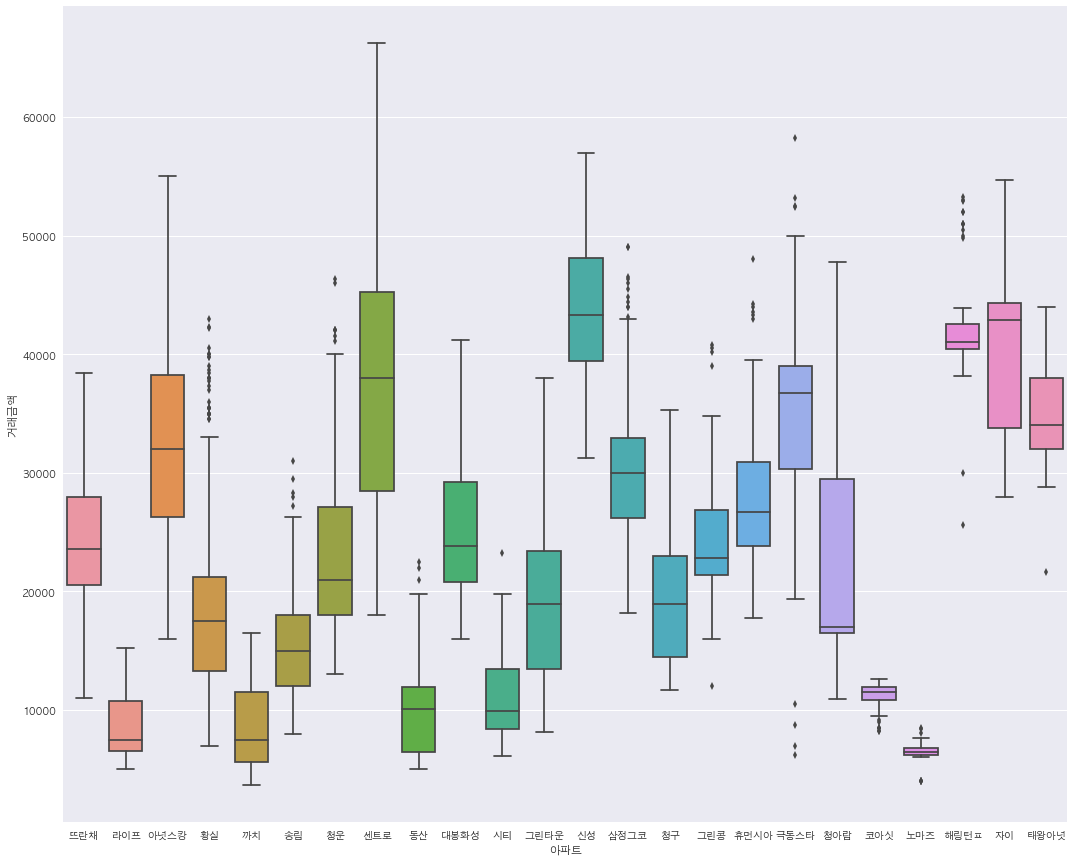

In [52]:
fig, ax = plt.subplots(figsize=(18, 15))
sns.boxplot(x='아파트', y='거래금액', data=df, ax=ax)

### numeric data 들의 상관관계를 보자

### 거래금액과 다른변수들의 상관관계

In [53]:
# 거래금액과 다른 변수들간의 상관계수
df.corr()['거래금액']

거래금액              1.000000
건축년도              0.447875
거래년도              0.357682
거래월               0.081924
전용면적(평)           0.697238
층                 0.336729
주차공간(지상)         -0.130549
주차공간(지하)          0.473252
동갯수               0.162684
일반관리인원            0.358329
엘리베이터갯수           0.208248
주변편의시설갯수(관공서)    -0.462234
주변편의시설갯수(병원)     -0.257282
주변편의시설갯수(백화점)     0.295732
주변편의시설갯수(대형상가)    0.082979
주변편의시설갯수(기타)     -0.442299
주변편의시설갯수(공원)      0.310906
주변교육시설갯수(초등학교)   -0.341186
주변교육시설갯수(중학교)    -0.166439
주변교육시설갯수(고등학교)   -0.371840
주변교육시설갯수(대학교)    -0.403080
부대/복리시설갯수         0.505282
주변편의시설(총)        -0.419763
주변교육시설(총)        -0.377904
Name: 거래금액, dtype: float64

양의 상관관계: 전용면적과 가장 큰 양의 상관관계를 보이고, 건축년도, 주차공간(지하), 부대복리시설

음의 상관관계: 관공서, 주변편의시설갯수(기타), 주변교육시설갯수(대학교)

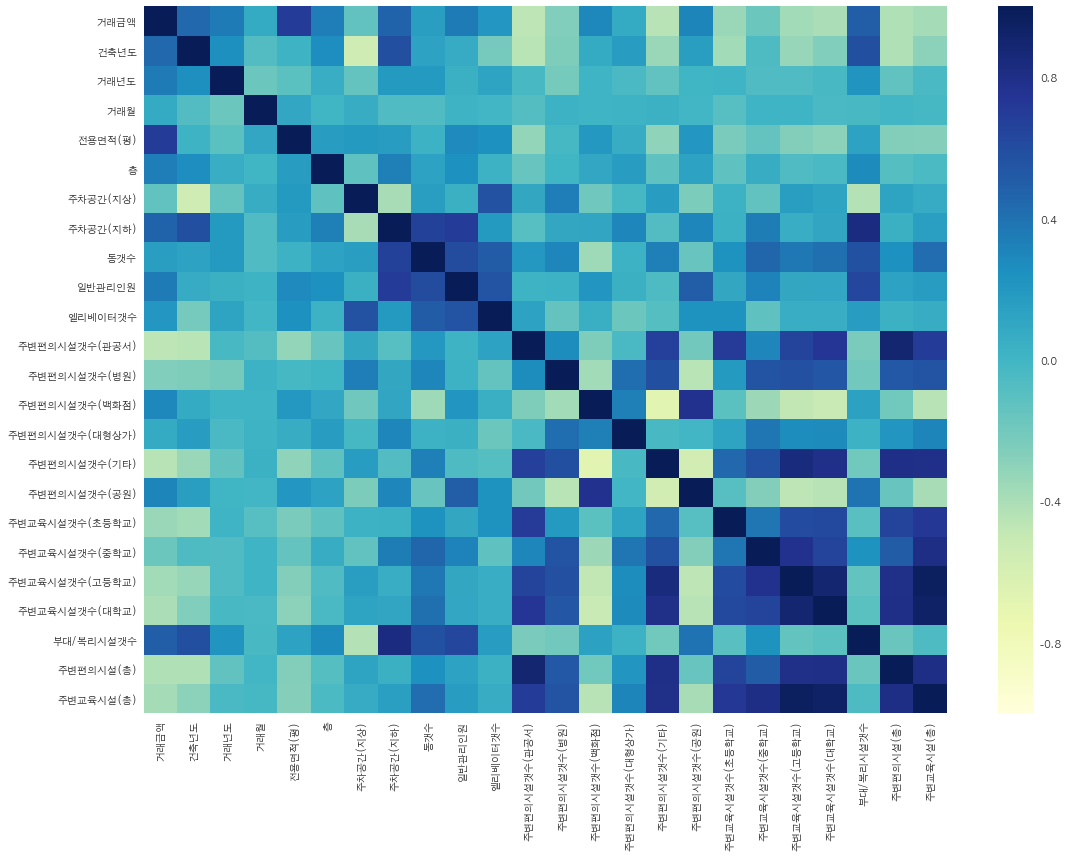

In [55]:
# 상관계수 시각화
# correlation heatmap
plt.subplots(figsize=(18,13))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

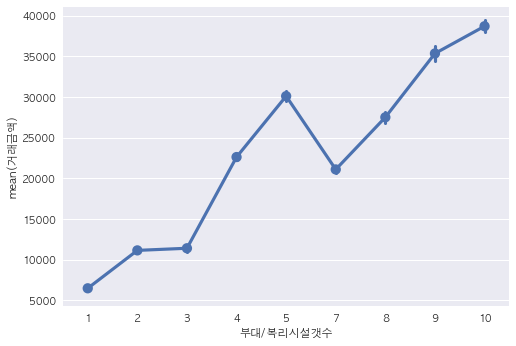

In [56]:
sns.pointplot(x='부대/복리시설갯수', y='거래금액', data=df)

#### 거래금액외 다른 변수들간의 관계

거래금액              0.505282
건축년도              0.592976
거래년도              0.219188
거래월              -0.028666
전용면적(평)           0.136444
층                 0.275527
주차공간(지상)         -0.437136
주차공간(지하)          0.835622
동갯수               0.576641
일반관리인원            0.633528
엘리베이터갯수           0.164246
주변편의시설갯수(관공서)    -0.229233
주변편의시설갯수(병원)     -0.202515
주변편의시설갯수(백화점)     0.142153
주변편의시설갯수(대형상가)    0.030362
주변편의시설갯수(기타)     -0.193037
주변편의시설갯수(공원)      0.394573
주변교육시설갯수(초등학교)   -0.098274
주변교육시설갯수(중학교)     0.241406
주변교육시설갯수(고등학교)   -0.140448
주변교육시설갯수(대학교)    -0.102172
부대/복리시설갯수         1.000000
주변편의시설(총)        -0.158251
주변교육시설(총)        -0.048206
Name: 부대/복리시설갯수, dtype: float64

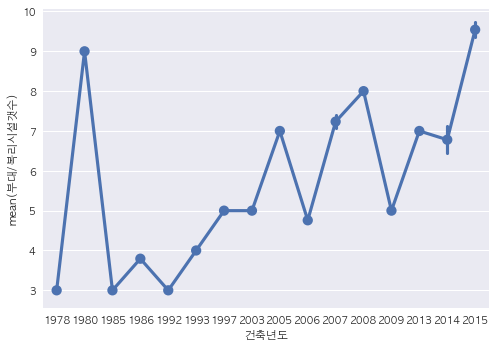

In [57]:
sns.pointplot(x='건축년도', y='부대/복리시설갯수', data=df)
df.corr()['부대/복리시설갯수']

신축일수록 점점 부대/복리시설의 갯수가 증가

In [58]:
df.corr()['주변편의시설갯수(관공서)']

거래금액             -0.462234
건축년도             -0.452542
거래년도             -0.028273
거래월              -0.072195
전용면적(평)          -0.317417
층                -0.155500
주차공간(지상)          0.096664
주차공간(지하)         -0.092837
동갯수               0.197965
일반관리인원            0.022702
엘리베이터갯수           0.135458
주변편의시설갯수(관공서)     1.000000
주변편의시설갯수(병원)      0.273301
주변편의시설갯수(백화점)    -0.246826
주변편의시설갯수(대형상가)   -0.033765
주변편의시설갯수(기타)      0.678009
주변편의시설갯수(공원)     -0.196514
주변교육시설갯수(초등학교)    0.706410
주변교육시설갯수(중학교)     0.301129
주변교육시설갯수(고등학교)    0.661604
주변교육시설갯수(대학교)     0.740207
부대/복리시설갯수        -0.229233
주변편의시설(총)         0.890958
주변교육시설(총)         0.702651
Name: 주변편의시설갯수(관공서), dtype: float64

관공서 근처에 초등학교와 고등학교 대학교가 많이 있다. 높은 상관관계를 보여줌

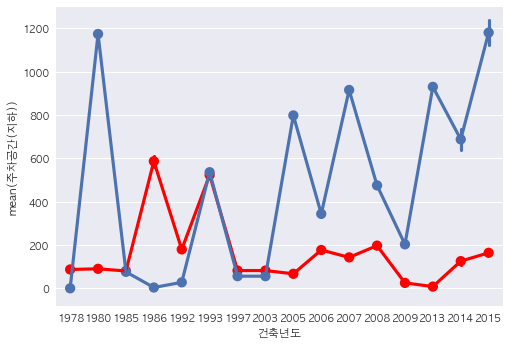

In [59]:
# 빨간색은 지상, 파란색은 지하
sns.pointplot(x='건축년도', y='주차공간(지상)', data=df, color="red")
sns.pointplot(x='건축년도', y='주차공간(지하)', data=df)

지상주차장의 숫자가 점점 적어지고 지하주차장의 숫자가 늘어남

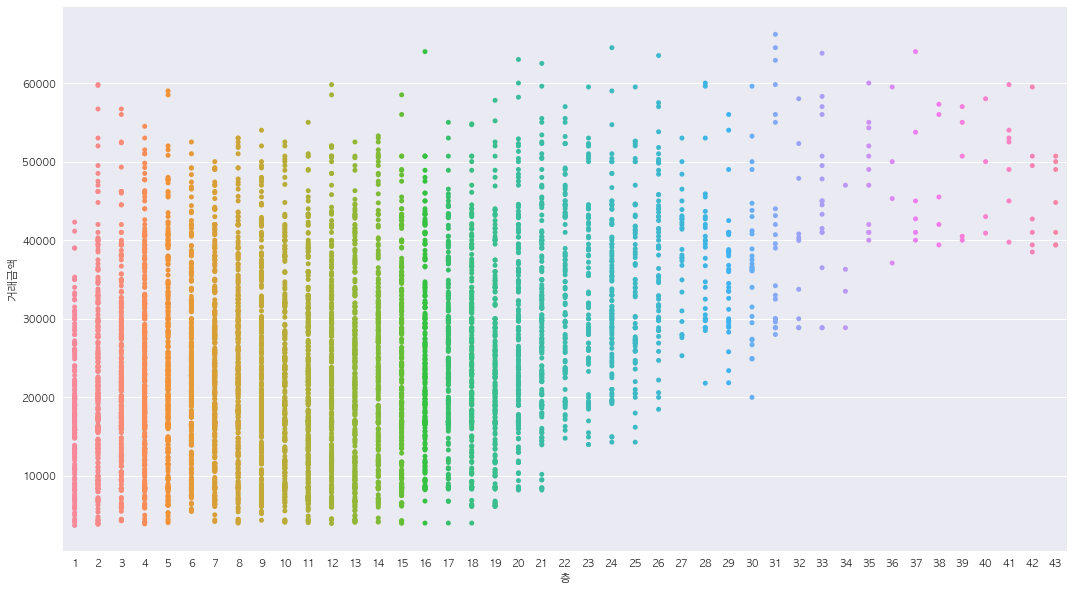

In [60]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.stripplot(x='층', y='거래금액', data=df)

거래금액 - 층. 확실한것은 고층에서 거래금액이 적은 거래는 없었다.

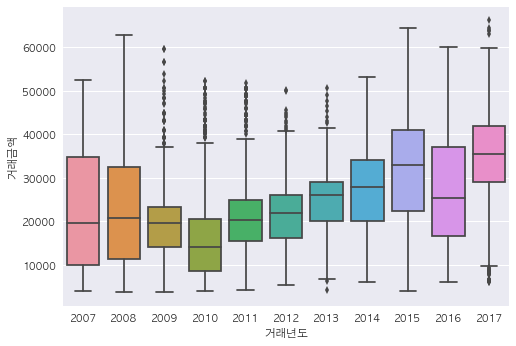

In [61]:
sns.boxplot(x='거래년도', y='거래금액', data=df)

거래금액은 상승추세

#### 데이터가 대구시의 특정동에서만 거래된 아파트 데이터라서 대구에 사시는분들에게는 이 시각화가 유용할것 같습니다.

#### 하지만 서울이나 다른지역에 사시는분들에게 또한 인사이트를 드리기 위해 머신러닝을 이용해서 가격과 다른 변수들간의 패턴을 찾아 일반화 해보도록 하겠습니다.